# Importing Library

In [1]:
import numpy as np                  #numpy library and alias np
import matplotlib.pyplot as plt  #accessing pyplot from matplotlib
import pandas as pd

# Importing Dataset

In [2]:
dataset = pd.read_csv("Data.csv") #accesing read_csv frpm pd lib and reading Data
X = dataset.iloc[:,1:-1].values    #matrix of features , matrix of feature is the matrix of data table where the features is described [2]
y = dataset.iloc[:,-1].values    #matrix of dependables

print(dataset)

            Position  Level   Salary
0   Business Analyst      1    45000
1  Junior Consultant      2    50000
2  Senior Consultant      3    60000
3            Manager      4    80000
4    Country Manager      5   110000
5     Region Manager      6   150000
6            Partner      7   200000
7     Senior Partner      8   300000
8            C-level      9   500000
9                CEO     10  1000000


# Analysing Shape

In [3]:
print(X) #features

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]


In [4]:
print(y) #dependables

[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


here we can see , the y is a 1D vector while X is 2D , feature scaling class StandardScalar doesnt accept 1D vector , to make it accept we need to reshape it

In [5]:
y=y.reshape(len(y),1)
y

array([[  45000],
       [  50000],
       [  60000],
       [  80000],
       [ 110000],
       [ 150000],
       [ 200000],
       [ 300000],
       [ 500000],
       [1000000]], dtype=int64)

# Feature Scalling

We need to scale both y and X as the range between y is a lot ranging from 45000 to 1000000

In [6]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y=StandardScaler()
X=sc_X.fit_transform(X)
y=sc_y.fit_transform(y)

In [7]:
X

array([[-1.5666989 ],
       [-1.21854359],
       [-0.87038828],
       [-0.52223297],
       [-0.17407766],
       [ 0.17407766],
       [ 0.52223297],
       [ 0.87038828],
       [ 1.21854359],
       [ 1.5666989 ]])

In [8]:
y

array([[-0.72004253],
       [-0.70243757],
       [-0.66722767],
       [-0.59680786],
       [-0.49117815],
       [-0.35033854],
       [-0.17428902],
       [ 0.17781001],
       [ 0.88200808],
       [ 2.64250325]])

In [9]:
from sklearn.svm import SVR
regressor = SVR(kernel='rbf')
regressor.fit(X,y)

C:\Users\mearj\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()


we need to predict X values via predict() which btw accepts 2Darr and thazt value will give a predict y val which you be inversed transform by sc_y so that the scalling get inversed transform and we get accurate value

In [10]:
sc_y.inverse_transform(regressor.predict(sc_X.transform([[6.5]])).reshape(-1,1))

array([[170370.0204065]])

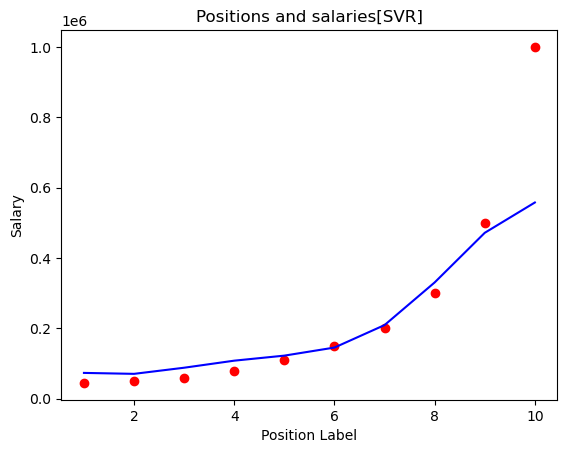

In [11]:
plt.scatter(sc_X.inverse_transform(X),sc_y.inverse_transform(y),color="red")
plt.plot(sc_X.inverse_transform(X),sc_y.inverse_transform(regressor.predict(X).reshape(-1,1)),color="blue")
plt.title("Positions and salaries[SVR]")
plt.xlabel("Position Label")
plt.ylabel("Salary")
plt.show()

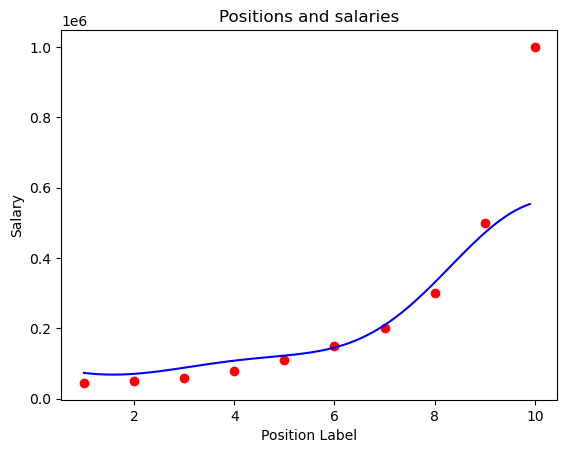

In [13]:
X_grid = np.arange(min(sc_X.inverse_transform(X)),max(sc_X.inverse_transform(X)),0.1)
X_grid=X_grid.reshape((len(X_grid),1))
plt.scatter(sc_X.inverse_transform(X),sc_y.inverse_transform(y),color='red')
plt.plot(X_grid,sc_y.inverse_transform(regressor.predict(sc_X.transform(X_grid)).reshape(-1,1)),color='blue')
plt.title("Positions and salaries")
plt.xlabel("Position Label")
plt.ylabel("Salary")
plt.show()